# EDA

In [1]:
%ls

EDA.ipynb  src/


In [2]:
%cd ../data_loader/src

/Users/socratis/PycharmProjects/intern_task_VK/data_loader/src


In [3]:
%ls

__pycache__/    data_loader.py


In [4]:
from data_loader import DataLoader

data_loader = DataLoader()
df = data_loader.load_data()

In [5]:
df

rank  query_id  feature_0  feature_1  feature_2  feature_3  feature_4  \
0          0        10        1.0        0.0        1.0        3.0        3.0   
1          1        10        3.0        0.0        3.0        0.0        3.0   
2          0        10        3.0        0.0        2.0        0.0        3.0   
3          1        10        3.0        0.0        3.0        0.0        3.0   
4          2        10        3.0        0.0        3.0        1.0        3.0   
...      ...       ...        ...        ...        ...        ...        ...   
235253     2     29995        1.0        0.0        0.0        0.0        1.0   
235254     2     29995        1.0        0.0        1.0        0.0        1.0   
235255     1     29995        1.0        0.0        0.0        0.0        1.0   
235256     2     29995        0.0        0.0        0.0        0.0        0.0   
235257     1     29995        0.0        0.0        0.0        0.0        0.0   

        feature_5  feature_6  feature_7  ...  feature_134  feature_135  \
0        0.333333        0.0   0.333333  ...          0.0     0.000000   
1        1.000000        0.0   1.000000  ...          0.0     0.000000   
2        1.000000        0.0   0.666667  ...          0.0     0.000000   
3        1.000000        0.0   1.000000  ...          0.0     0.000000   
4        1.000000        0.0   1.000000  ...        273.0    79.670665   
...           ...        ...        ...  ...          ...          ...   
235253   0.500000        0.0   0.000000  ...          0.0     0.000000   
235254   0.500000        0.0   0.500000  ...          0.0     0.000000   
235255   0.500000        0.0   0.000000  ...          0.0     0.000000   
235256   0.000000        0.0   0.000000  ...          0.0     0.000000   
235257   0.000000        0.0   0.000000  ...          0.0     0.000000   

        feature_136  feature_137  feature_138  feature_139  feature_140  \
0          0.454545     0.890238     8.655534     1.000000     0.077778   
1          0.000000     0.773976    23.130514     0.000000     0.027826   
2          0.000000     0.918308    13.351339     0.000000     0.014925   
3          0.000000     0.975355    18.240926     0.000000     0.053140   
4          0.200000     0.990119    31.786048     0.333333     0.046512   
...             ...          ...          ...          ...          ...   
235253     0.000000     0.471409     0.000000     0.000000     0.001350   
235254     0.000000     0.471409    39.908056     0.000000     0.004850   
235255     0.000000     0.471409     0.000000     0.000000     0.001064   
235256     0.000000     0.000000     0.000000     0.000000     0.000000   
235257     0.000000     0.000000     0.000000     0.000000     0.000000   

        feature_141  feature_142  feature_143  
0          0.002222          1.0     0.333333  
1          0.000430         44.0    14.666667  
2          0.000104         22.0     7.333333  
3          0.000255          8.0     2.666667  
4          0.000307         24.0     8.000000  
...             ...          ...          ...  
235253     0.000002          3.0     1.500000  
235254     0.000014          9.0     4.500000  
235255     0.000001          1.0     0.500000  
235256     0.000000          0.0     0.000000  
235257     0.000000          0.0     0.000000  

[235258 rows x 146 columns]

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(df.shape)

(235258, 146)


In [7]:
df.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235258 entries, 0 to 235257
Columns: 146 entries, rank to feature_143
dtypes: float64(140), int64(6)
memory usage: 262.1 MB


In [9]:
df.isnull().values.any()

False

=> в датасете нет пропущенных значений NaN

#### Найдем корреляции между переменными

<Axes: >

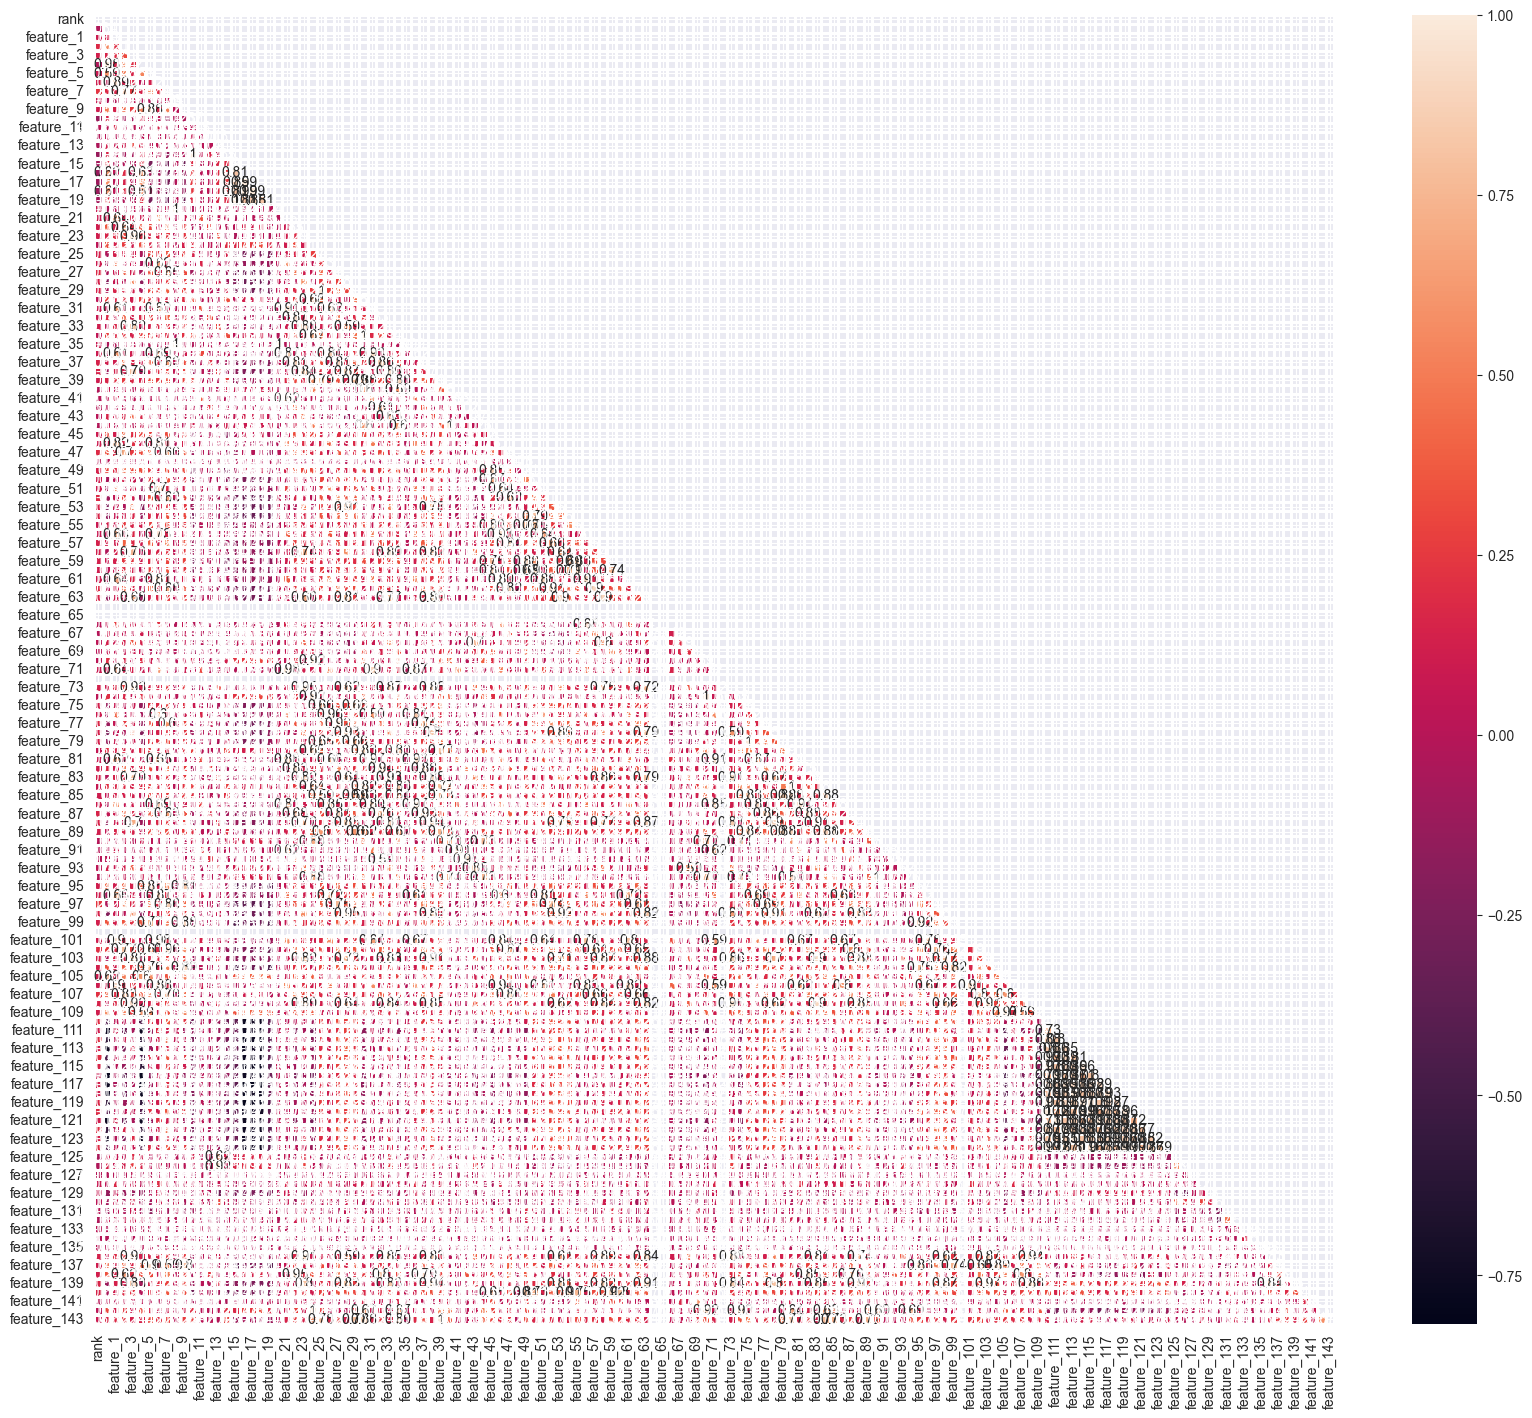

In [10]:
corr_data = df.drop(['query_id'], axis=1)
plt.figure(figsize=(20,17))
matrix = np.triu(corr_data.corr())
sns.heatmap(corr_data.corr(), annot=True, linewidth=.8,mask=matrix, cmap='rocket')

#### Визуализируем количественные данные

##### График частот

In [11]:
plot_data = corr_data

In [12]:
from tqdm import tqdm

Графики частот:   3%|▎         | 5/145 [00:01<00:49,  2.81it/s]/var/folders/cr/0fzq0bwx2pngt4ykckw13q1c0000gn/T/ipykernel_16838/1774994833.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout(pad=3.0)
Графики частот: 100%|██████████| 145/145 [12:14<00:00,  5.06s/it]


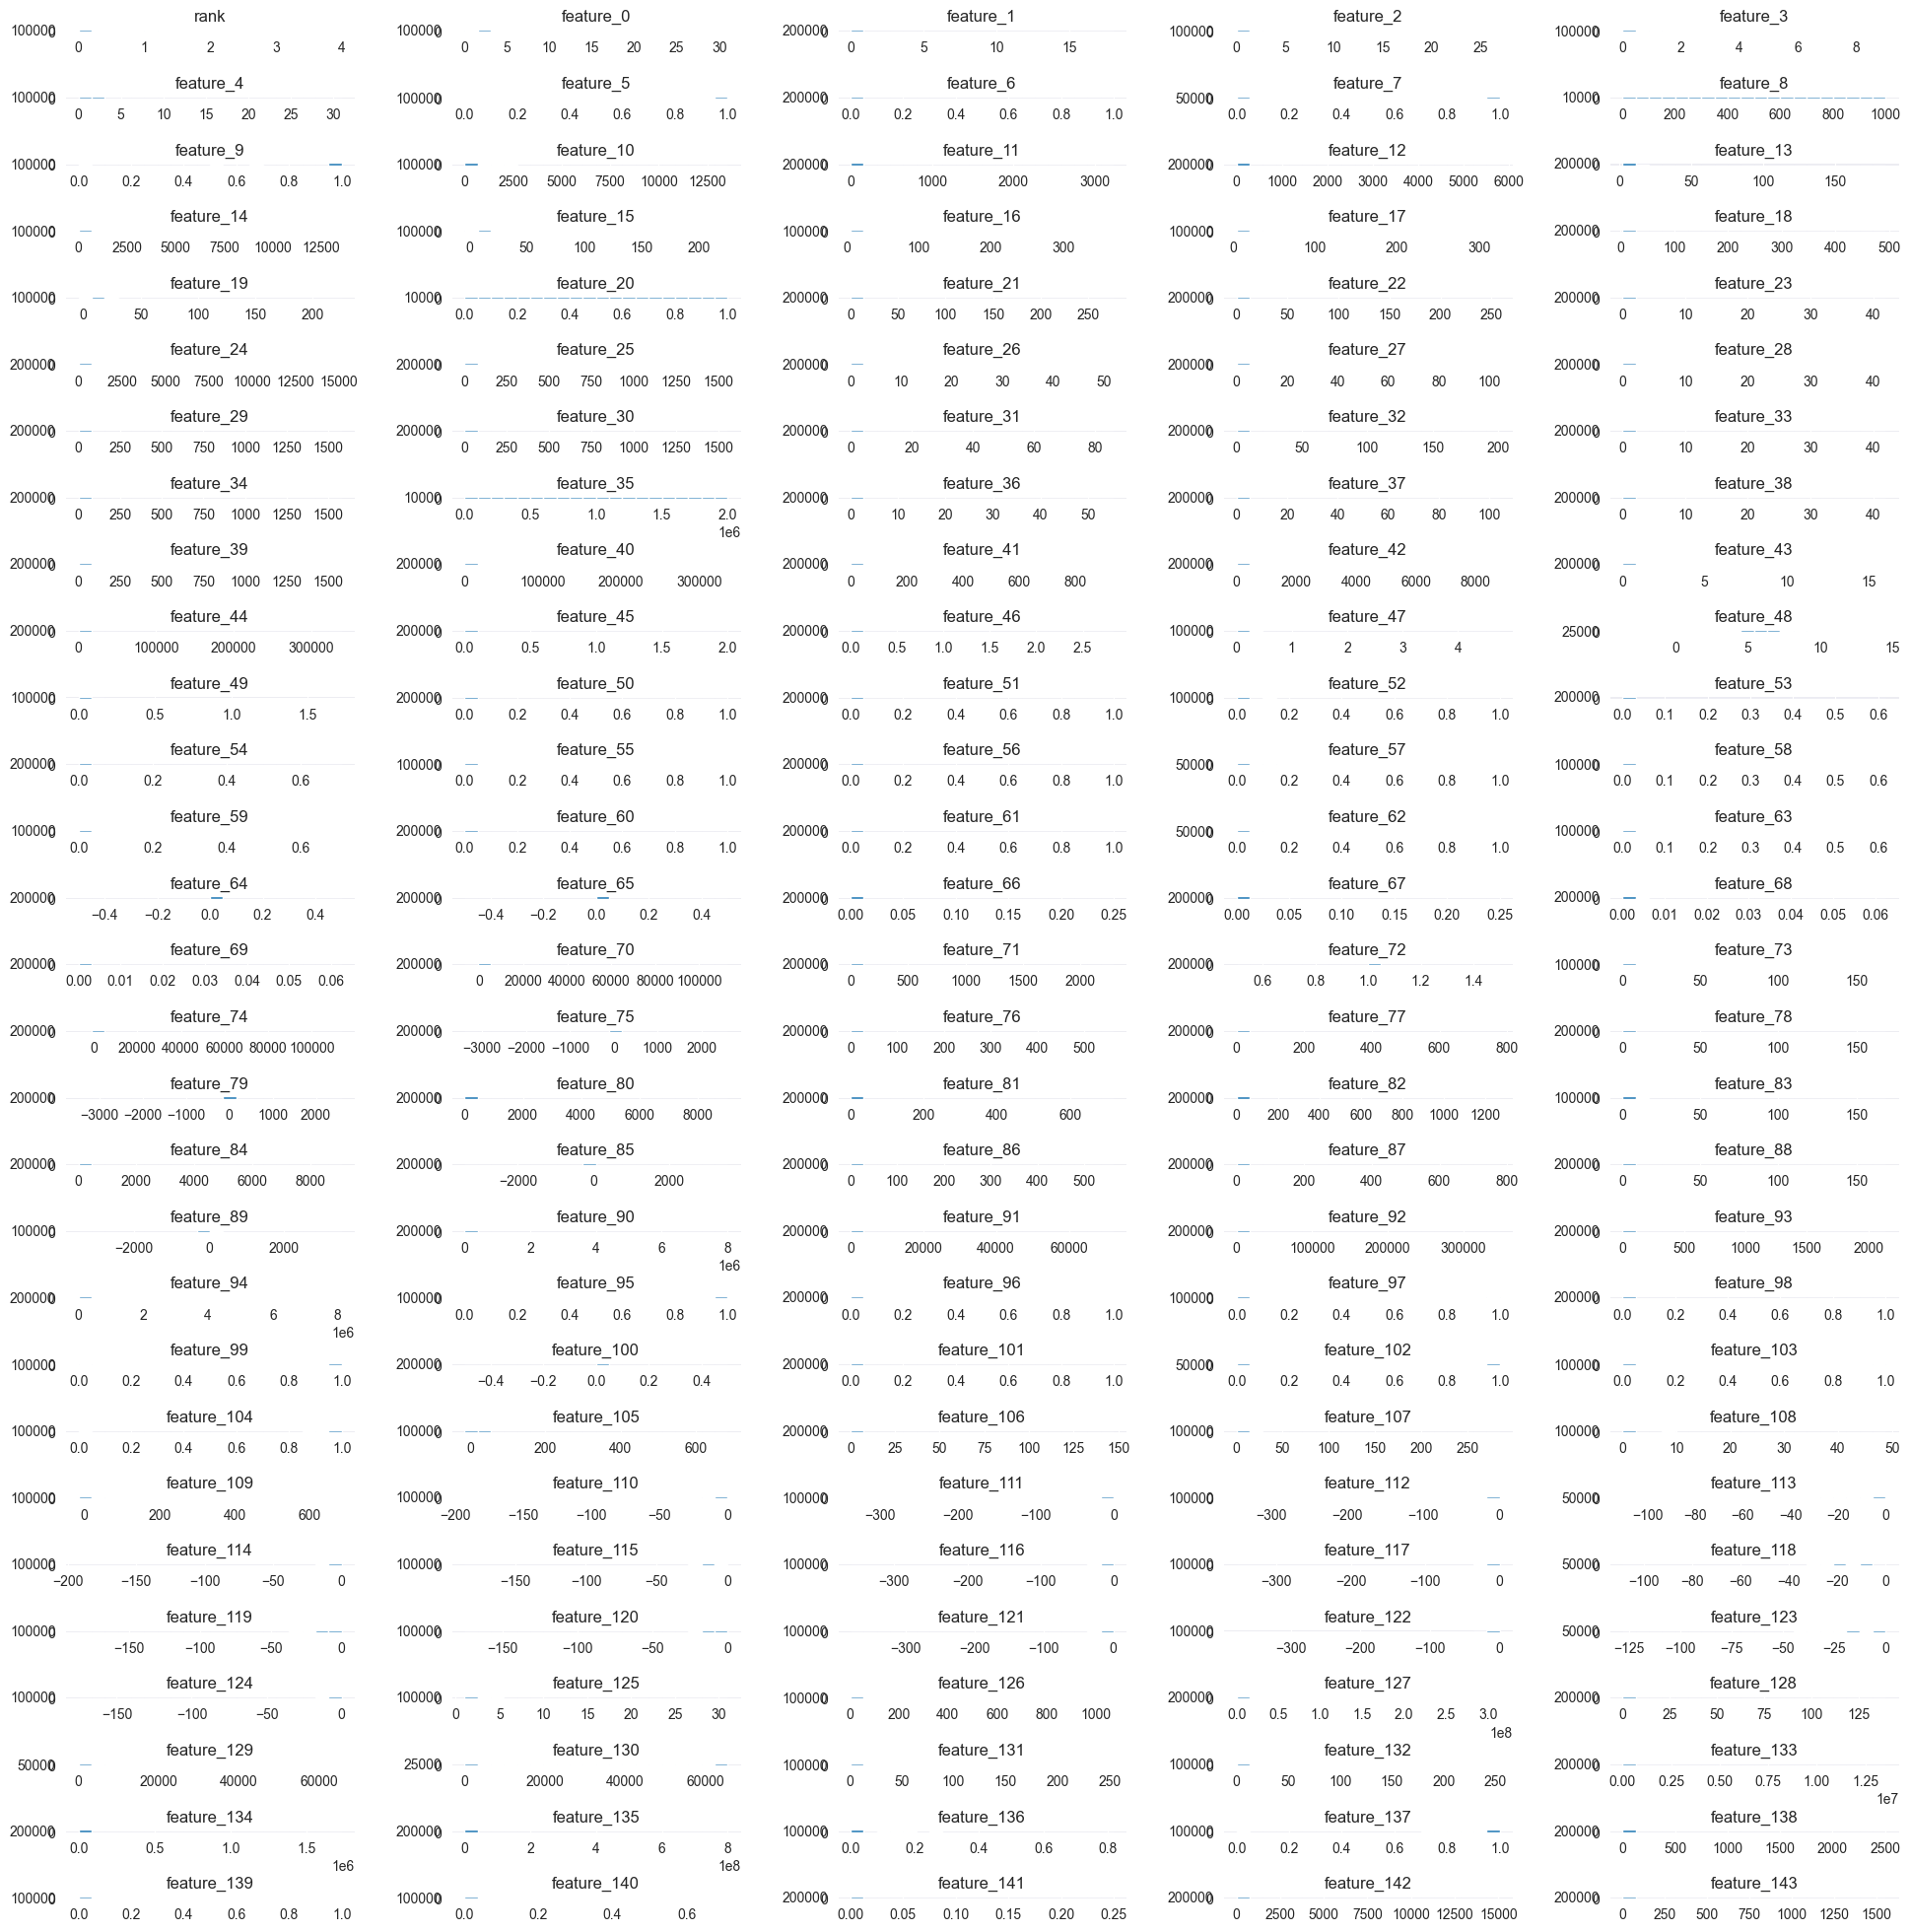

In [13]:
fig = plt.figure(figsize=(20,20))
for i in tqdm(range(len(plot_data.columns)), desc = 'Графики частот'):
    fig.add_subplot(int(np.ceil(len(plot_data.columns)/5)), 5, i+1)
    plot_data.iloc[:, i].hist(bins=20)
    plt.title(plot_data.columns[i])
    fig.tight_layout(pad=3.0)
plt.show()

ValueError: num must be an integer with 1 <= num <= 84, not 85

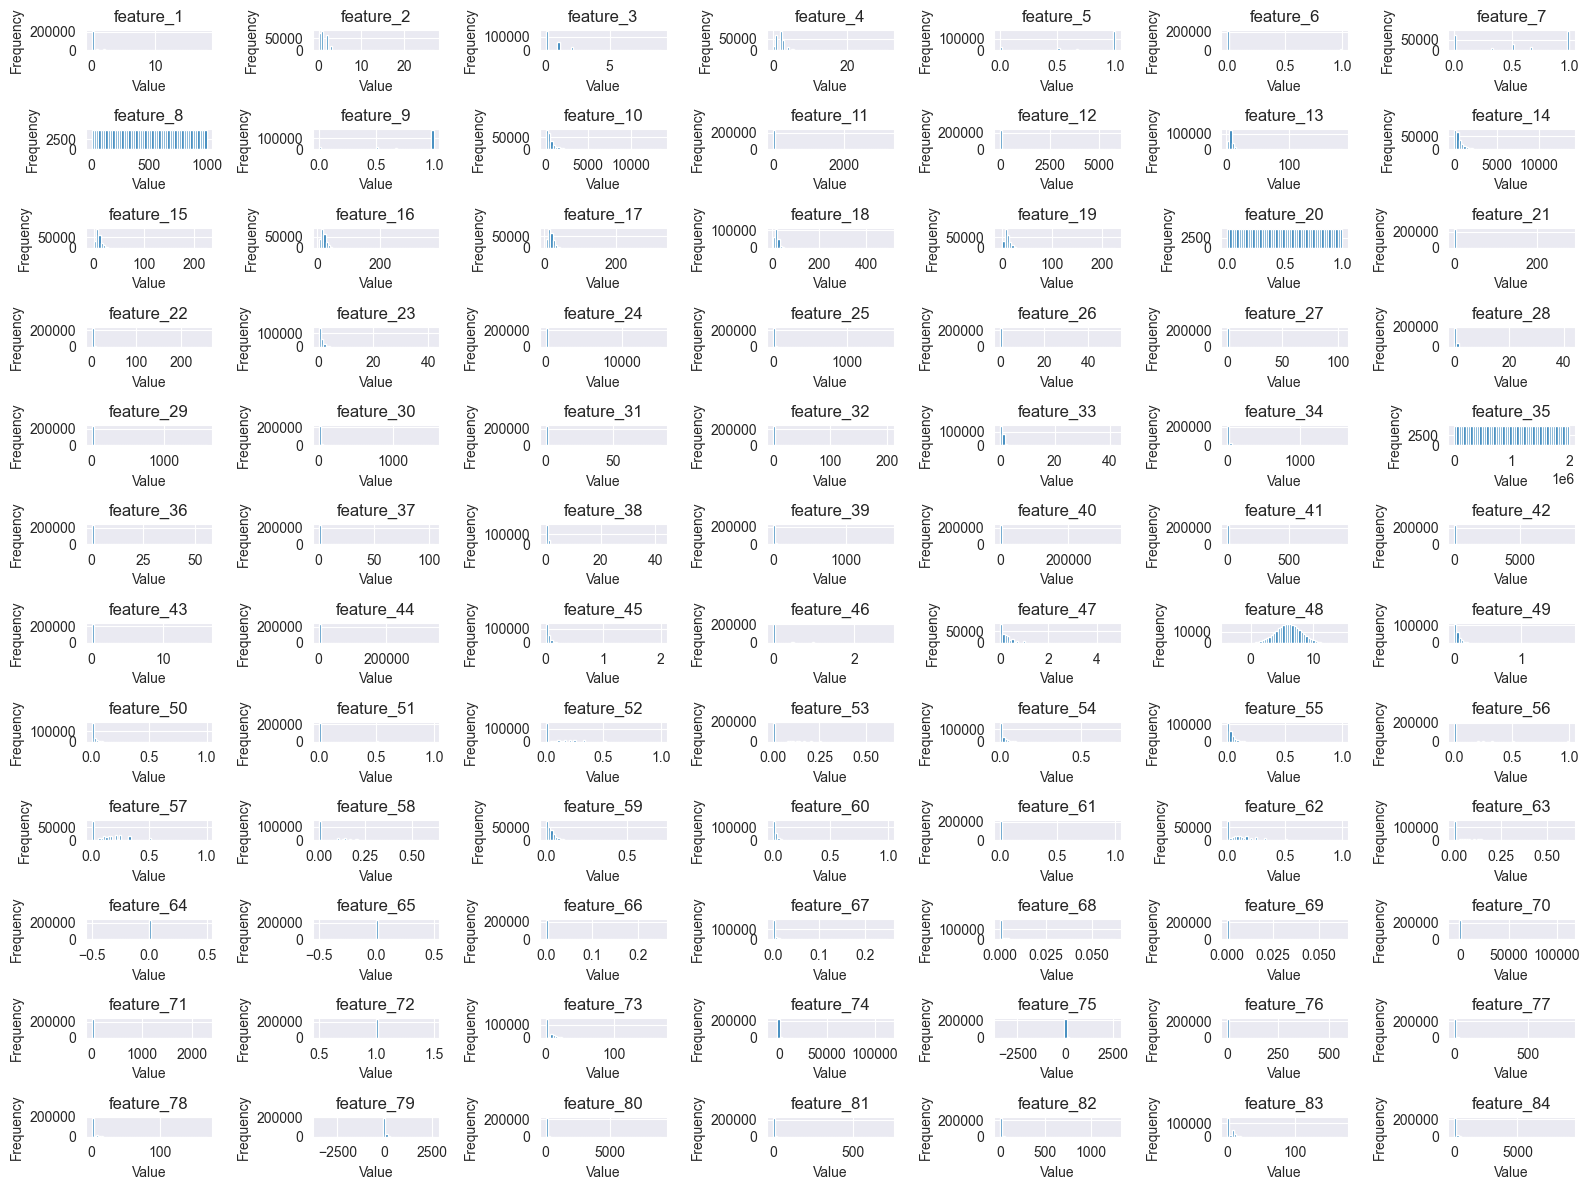

In [14]:
# Выбираем столбцы feature
features = df.loc[:, 'feature_1':'feature_143']

# Рисуем гистограммы
plt.figure(figsize=(16,12))
for i, column in enumerate(features):
    plt.subplot(12, 7, i + 1)  # 12 рядов и 7 столбцов, i + 1 номер текущего подграфика
    plt.hist(features[column], bins=50)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

##### Гистограммы распределения значений feature

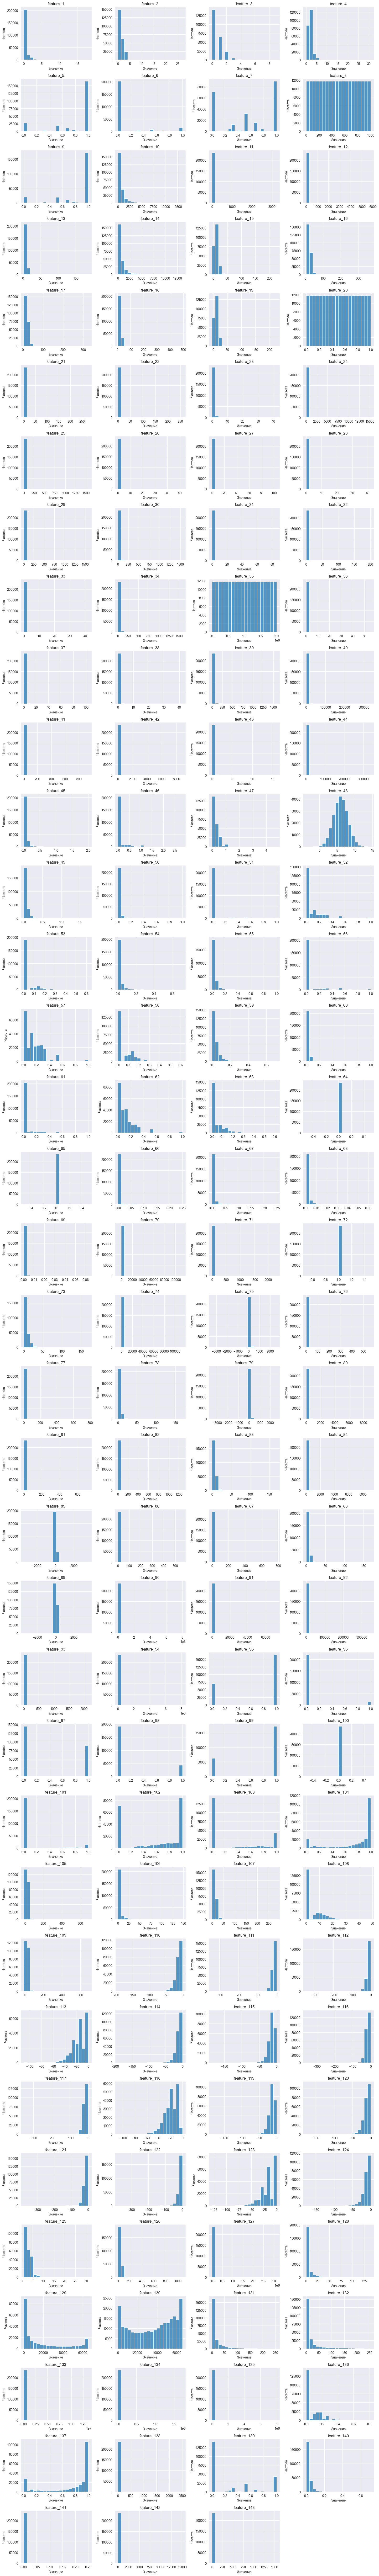

In [15]:
# Выбираем только столбцы с признаками
features = df.iloc[:, 3:]

# Создаем сетку графиков
num_features = len(features.columns)
cols = 4  # Количество колонок в сетке графиков
rows = (num_features - 1) // cols + 1  # Рассчитываем количество строк в сетке

# Размеры графика
plt.figure(figsize=(cols * 4, rows * 3))

# Перебираем признаки и строим гистограммы для каждого
for i, feature in enumerate(features.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[feature], bins=20)
    plt.title(feature)
    plt.xlabel('Значение')
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

##### Диаграммы рассеяния для feature и rank

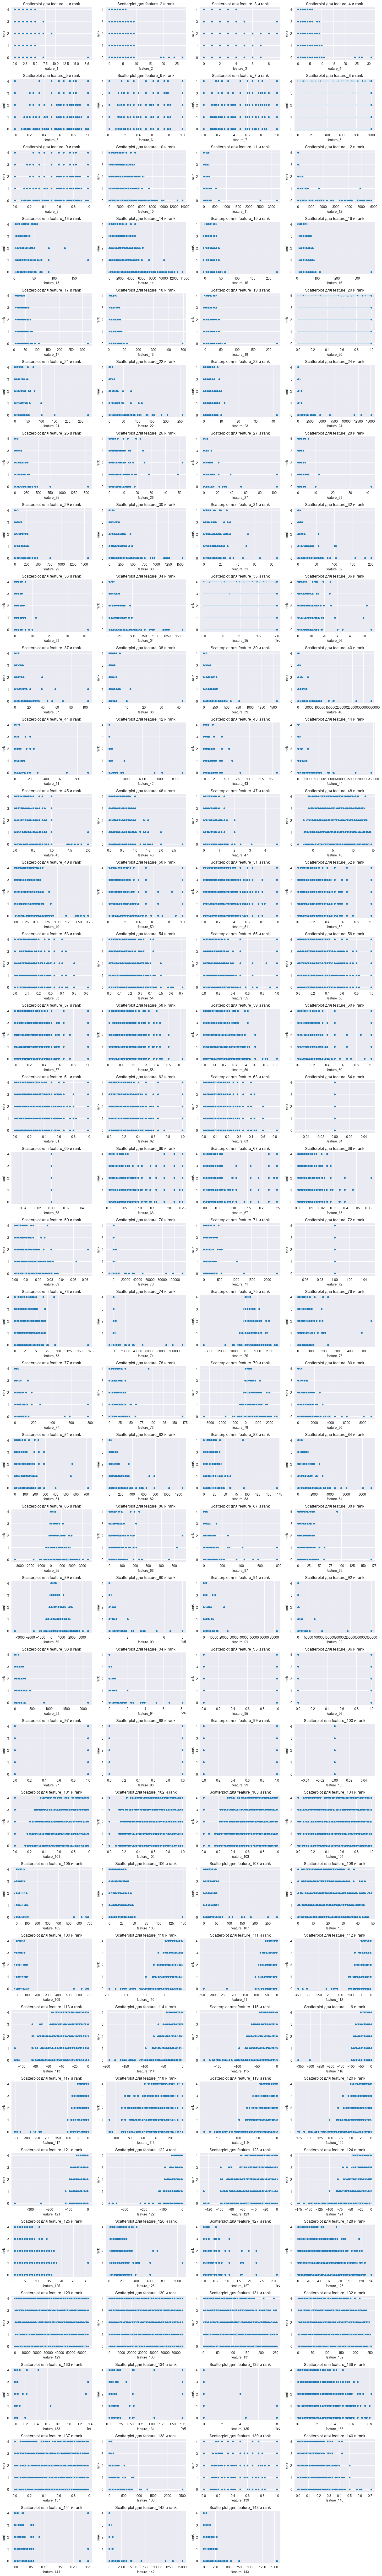

In [16]:
# Размеры графика
plt.figure(figsize=(cols * 4, rows * 3))

# Перебираем признаки и строим диаграммы рассеяния для каждого с rank
for i, feature in enumerate(features.columns, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(data=df, x=feature, y='rank')
    plt.title(f'Scatterplot для {feature} и rank')
    plt.xlabel(feature)
    plt.ylabel('rank')

plt.tight_layout()
plt.show()

##### Изучим распеделение классов

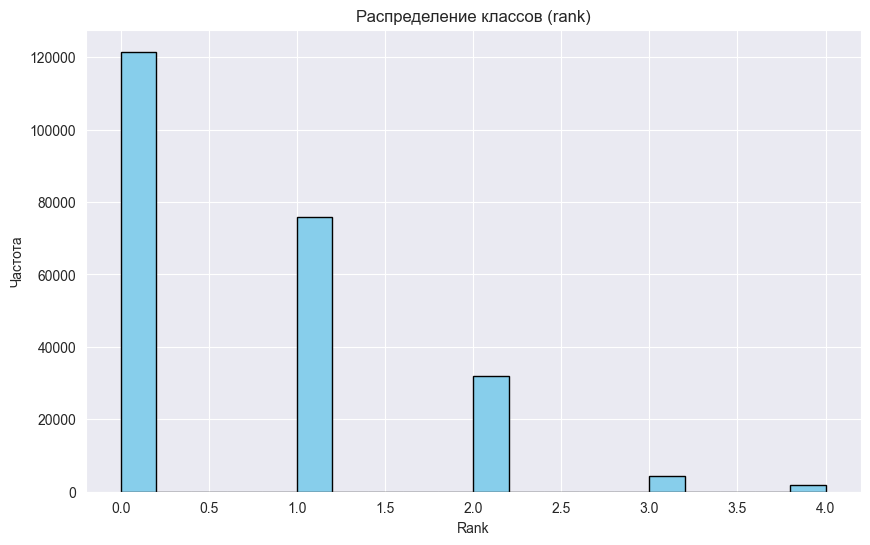

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df['rank'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение классов (rank)')
plt.xlabel('Rank')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

##### Проверка выбросов

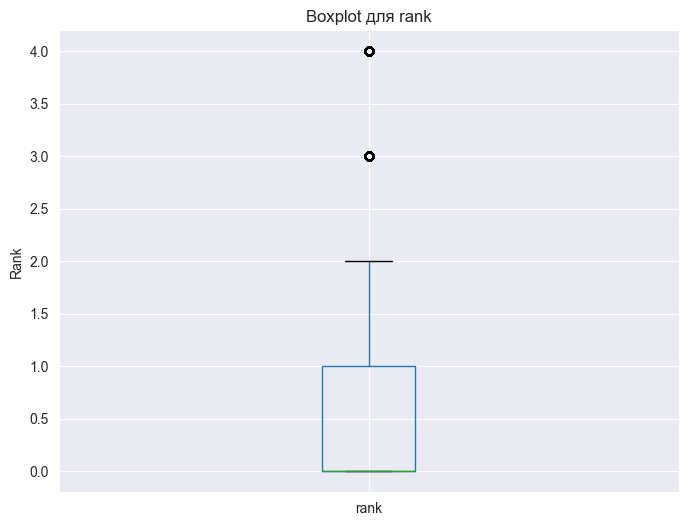

In [18]:
# Построение ящиков с усами для выборки rank
plt.figure(figsize=(8, 6))
df.boxplot(column=['rank'])
plt.title('Boxplot для rank')
plt.ylabel('Rank')
plt.grid(True)
plt.show()

In [19]:
from scipy import stats

# Вычисление z-оценки для столбца 'rank'
z_scores = stats.zscore(df['rank'])
threshold = 3
outliers = df[(z_scores > threshold) | (z_scores < -threshold)]
print("Выбросы по z-оценке:")
print(outliers)

Выбросы по z-оценке:
        rank  query_id  feature_0  feature_1  feature_2  feature_3  feature_4  \
22         4        10        3.0        0.0        3.0        0.0        3.0   
24         4        10        3.0        0.0        3.0        0.0        3.0   
72         4        10        3.0        0.0        3.0        0.0        3.0   
287        4        55        2.0        0.0        2.0        0.0        2.0   
398        4        70        0.0        0.0        0.0        0.0        0.0   
...      ...       ...        ...        ...        ...        ...        ...   
234654     4     29890        0.0        0.0        0.0        0.0        0.0   
234655     4     29890        0.0        0.0        0.0        0.0        0.0   
234953     4     29950        1.0        0.0        0.0        1.0        1.0   
235022     4     29950        1.0        0.0        0.0        1.0        1.0   
235227     4     29995        0.0        0.0        0.0        0.0        0.0   

      

##### Проверим наличие дубликатов

In [20]:
duplicates = df[df.duplicated()]
print("Количество дубликатов в датасете:", len(duplicates))

if len(duplicates) > 0:
    print("Примеры дубликатов:")
    print(duplicates.head())
else:
    print("В датасете нет дубликатов.")

Количество дубликатов в датасете: 0
В датасете нет дубликатов.


##### Группировка данных по query_id

In [21]:
# Группировка данных по query_id
grouped_data = df.groupby('query_id')

# Пример агрегированных операций сгруппированных данных
# Например, средние значения feature и rank для каждого query_id
mean_values = grouped_data.mean()

# Вывод первых нескольких строк агрегированных данных
print(mean_values.head())

              rank  feature_0  feature_1  feature_2  feature_3  feature_4  \
query_id                                                                    
10        0.728261   2.521739   0.250000   1.826087   0.423913   2.543478   
25        0.189655   2.551724   0.000000   0.275862   0.086207   2.551724   
40        0.095238   2.630952   0.107143   0.928571   0.583333   2.630952   
55        1.137931   1.896552   0.172414   1.189655   0.758621   1.896552   
70        0.815951   2.803681   0.153374   2.233129   0.282209   2.815951   

          feature_5  feature_6  feature_7  feature_8  ...  feature_134  \
query_id                                              ...                
10         0.840580   0.083333   0.608696   0.193406  ...    42.684783   
25         0.850575   0.000000   0.091954   0.512206  ...     1.293103   
40         0.876984   0.035714   0.309524   0.814003  ...    18.666667   
55         0.948276   0.086207   0.594828   1.115801  ...     1.189655   
70         0.934